##  LAB 5 - DIABETES CLASSIFICATION USING LOGISTIC REGRESSION

### STEP 1:[UNDERSTAND DATA]

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('diabetes.csv')

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.shape

(768, 9)

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [26]:
df['Glucose'].value_counts

<bound method IndexOpsMixin.value_counts of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64>

### STEP 2:[BUILD LOGISTIC REGRESSION MODEL]

In [27]:
X = df.drop(['Outcome'],axis =1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [28]:
y = df[['Outcome']].values
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
sss = StratifiedShuffleSplit(n_splits =4, test_size = 0.25, random_state =42)
sss.get_n_splits(X,y)

4

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size =0.25, random_state =42)

In [34]:
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression()
LOR.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = LOR.predict(X_test)

### STEP 3:[PREDICT ON A NEW SAMPLE]

In [36]:
new_person = [[6,200,90,10,25,23.3,0.672,42]]

In [37]:
LOR.predict(new_person)

array([1], dtype=int64)

This new sample will become diabetic

### STEP 4 :[COMPUTE CLASSIFICATION METRICS]

#### PRECISION

In [39]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6363636363636364

#### RECALL

In [40]:
from sklearn.metrics import recall_score

In [41]:
recall_score(y_test, y_pred)

0.5223880597014925

#### ACCURACY

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
Lor_acc = accuracy_score(y_test, y_pred)
Lor_acc

0.7291666666666666

#### AUC SCORE

In [44]:

from sklearn.metrics import roc_auc_score

In [45]:
lor_auc = roc_auc_score(y_test, y_pred)
lor_auc

0.6811940298507462

### STEP 5 :[UNDERSTAND CONFUSION MATRIX]

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [61]:
cf_matrix

array([[105,  20],
       [ 32,  35]], dtype=int64)

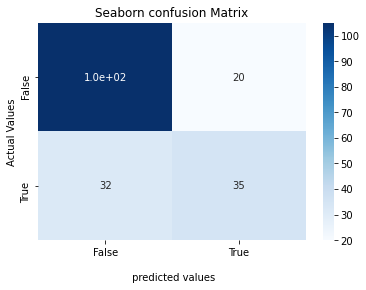

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap (cf_matrix, annot = True, cmap = 'Blues')
ax.set_title('Seaborn confusion Matrix')
ax.set_xlabel('\n predicted values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### STEP 6:[NORMALIZATION USING MIN MAX SCALER]

In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [64]:
X_train_mm = min_max.fit_transform(X_train)
X_test_mm = min_max.transform(X_test)

In [65]:
LOR_MM = LogisticRegression()
LOR_MM.fit(X_train_mm, y_train)
y_pred_mm = LOR_MM.predict(X_test_mm)
y_pred_mm

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

#### ACCURACY

In [66]:
from sklearn.metrics import accuracy_score
minmax_acc = accuracy_score(y_test, y_pred_mm)
minmax_acc

0.7447916666666666

#### PRECISION

In [67]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_mm)

0.6875

#### RECALL 

In [68]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_mm)

0.4925373134328358

#### AUC SCORE

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_mm)
roc_auc = (' LOR MINMAX AUC', roc_auc)
roc_auc

(' LOR MINMAX AUC', 0.6862686567164178)

### STEP 7 :[STANDARD SCALER]

In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [71]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [72]:
LOR_SS = LogisticRegression()
LOR_SS.fit(X_train_ss, y_train)
y_pred_ss = LOR_SS.predict(X_test_ss)
y_pred_ss

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

#### ACCURACY

In [73]:
from sklearn.metrics import accuracy_score
ss_acc = accuracy_score(y_test, y_pred_ss)
ss_acc

0.734375

#### PRECISION

In [74]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_ss)

0.6481481481481481

#### RECALL

In [75]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_ss)

0.5223880597014925

#### AUC SCORE

In [76]:
from sklearn.metrics import roc_auc_score
auc_ss = roc_auc_score(y_test, y_pred_ss)
auc_ss = (' LOR  MINMAX AUC', auc_ss)
auc_ss

(' LOR  MINMAX AUC', 0.6851940298507463)

#### BEST MODEL

In [77]:
print('Logistic Regression Model : ',Lor_acc)
print('MinMaxScaler : ',minmax_acc)
print('Standard Scaler: ',ss_acc)

print('Best model value is :',max(Lor_acc,minmax_acc,ss_acc))

Logistic Regression Model :  0.7291666666666666
MinMaxScaler :  0.7447916666666666
Standard Scaler:  0.734375
Best model value is : 0.7447916666666666


### STEP 8 :[PLOT ROC CURVE]

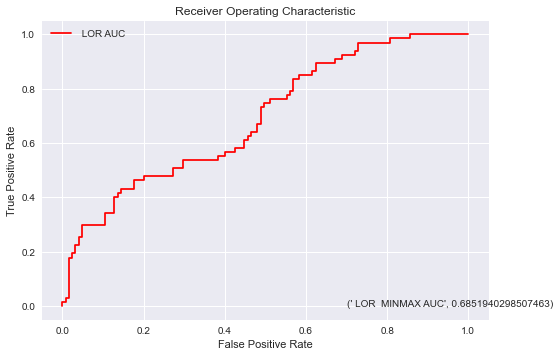

In [81]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

pred_prob = LOR.predict_proba(X_test_mm)
fpr,tbr,threshold = roc_curve(y_test, pred_prob[:,1],pos_label=1)

plt.style.use('seaborn')
plt.annotate(xy=[0.7,0],s= auc_ss)
plt.plot(fpr, tbr, 'r', label = ' LOR AUC')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




### STEP 9 :[COMPARISON WITH KNN CLASSIFIER]

In [82]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)


In [83]:
neigh.fit(X_train_mm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred_knn = neigh.predict(X_test_mm)

#### ACCURACY

In [85]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_acc

0.71875

#### RECALL

In [86]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn)

0.5223880597014925

#### AUC SCORE

In [87]:
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test, y_pred_knn)
knn_auc = (' KNN MINMAX AUC', knn_auc)
knn_auc


(' KNN MINMAX AUC', 0.6731940298507463)

#### PRECISION

In [88]:
from sklearn.metrics import precision_score
accuracy_score(y_test, y_pred_knn)

0.71875

### STEP 10 :[UPDATE ROC CURVE]

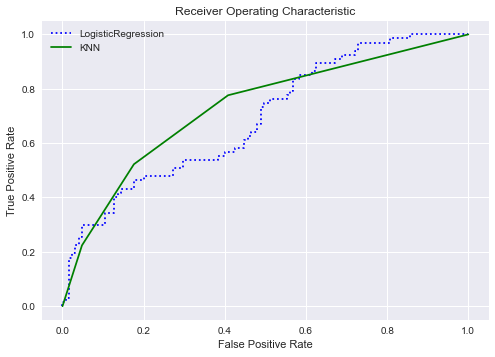

In [90]:
pred_prob1 = neigh.predict_proba(X_test_mm)
fpr,tbr,threshold = roc_curve(y_test, pred_prob[:,1])
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob1[:,1],pos_label=1)


plt.plot(fpr, tbr, linestyle=':', color='b', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='g', label='KNN')

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### STEP 11 :[REGULARIZATION]

In [91]:
from sklearn.linear_model import LogisticRegressionCV

In [92]:
model1 = LogisticRegressionCV(Cs =10, cv=4, penalty ='l1', solver='liblinear')
model2= LogisticRegressionCV(Cs =10, cv=4, penalty ='l2')

In [93]:
model1.fit(X_train_mm, y_train)
model2.fit(X_train_mm, y_train)

LogisticRegressionCV(cv=4)

In [94]:
rg_y_pred1 = model1.predict(X_test_mm)
rg_y_pred2 = model2.predict(X_test_mm)

In [95]:
rg_y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [96]:
rg_y_pred2

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

#### AUC SCORE OF L1

In [97]:
from sklearn.metrics import roc_auc_score
l1_auc = roc_auc_score(y_test, rg_y_pred1)
l1_auc = (' LOR L1 MINMAX AUC', l1_auc)
l1_auc


(' LOR L1 MINMAX AUC', 0.6811940298507462)

#### AUC SCORE OF L2

In [98]:
from sklearn.metrics import roc_auc_score
l2_auc = roc_auc_score(y_test, rg_y_pred2)
l2_auc = (' LOR L2 MINMAX AUC', l2_auc)
l2_auc

(' LOR L2 MINMAX AUC', 0.6891940298507462)

### STEP 12 : [UPDATE ROC CURVE]

In [99]:
pred_prb7 = model1.predict_proba(X_test_mm)
pred_prb8 = model2.predict_proba(X_test_mm)

fpr,tbr,threshold = roc_curve(y_test, pred_prob[:,1],pos_label=1)
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob1[:,1],pos_label=1)
fpr2,tbr2,threshold2= roc_curve(y_test, pred_prb7[:,1],pos_label=1)
fpr3,tbr3,threshold3 = roc_curve(y_test, pred_prb8[:,1],pos_label=1)

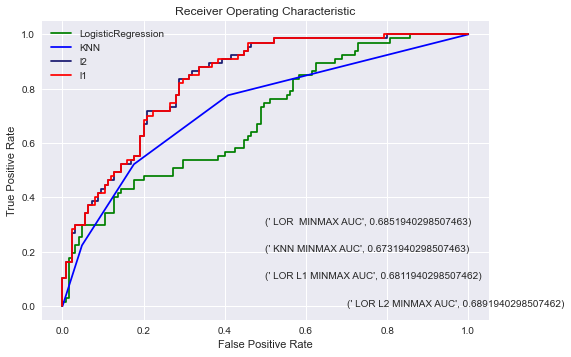

In [100]:
plt.plot(fpr, tbr, linestyle='-', color='g', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='b', label='KNN')
plt.plot(fpr3, tbr3, linestyle='-', color='midnightblue', label='l2')
plt.plot(fpr2, tbr2, linestyle='-', color='r', label='l1')

plt.annotate(xy=[0.5,0.3],s= auc_ss)
plt.annotate(xy=[0.5,0.2],s= knn_auc)
plt.annotate(xy=[0.5,0.1],s= l1_auc)
plt.annotate(xy=[0.7,0],s= l2_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# CONCLUSION

### out of these 4 models knn is best